# 00. Exploration des Données (Data Check)
**Projet KDD - Decision Stump C5.0**

Ce notebook a pour but de vérifier l'intégrité du dataset (Iris), d'analyser la distribution des variables et d'identifier les features les plus prometteuses pour un Decision Stump (profondeur 1).
---

In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ajout du dossier parent au chemin pour importer 'src'
sys.path.append(os.path.abspath('..'))

# Configuration graphique
%matplotlib inline
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Environnement chargé.")

✅ Environnement chargé.


## 1. Chargement des Données

In [2]:
# Chargement
try:
    df = pd.read_csv('../data/raw/iris.csv')
    print(f"Dataset chargé : {df.shape}")
except FileNotFoundError:
    print("⚠️ Chargement depuis Sklearn (fichier local absent)")
    from sklearn.datasets import load_iris
    data = load_iris()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    df['target'] = data.target

display(df.head())
print(df.info())

Dataset chargé : (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


## 2. Vérification des Valeurs Manquantes
L'algorithme C5.0 gère les NaN, mais il est bon de savoir s'il y en a.

In [3]:
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✅ Aucune valeur manquante détectée (Dataset propre).")
else:
    print("⚠️ Valeurs manquantes détectées :")
    print(missing[missing > 0])

✅ Aucune valeur manquante détectée (Dataset propre).


## 3. Visualisation des Relations (Pairplot)
Nous cherchons une feature capable de séparer au moins une classe avec une seule ligne droite (Stump).

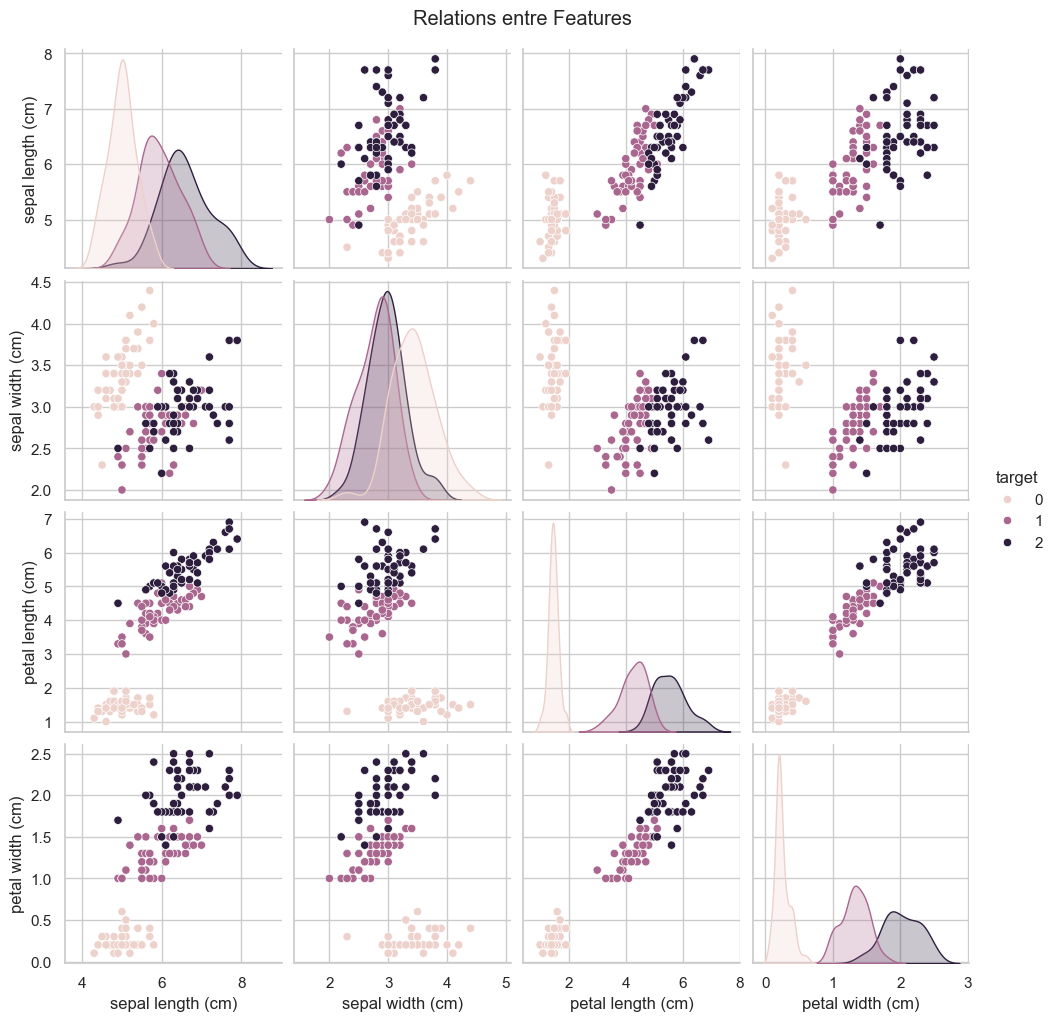

In [4]:
# On suppose que la dernière colonne est la cible
target_col = df.columns[-1]

sns.pairplot(df, hue=target_col, height=2.5)
plt.suptitle("Relations entre Features", y=1.02)
plt.show()

**Observation :** Regardez les distributions sur la diagonale. Si une classe est isolée (comme les points bleus souvent pour *Setosa*), le Decision Stump aura une excellente performance.

## 4. Matrice de Corrélation

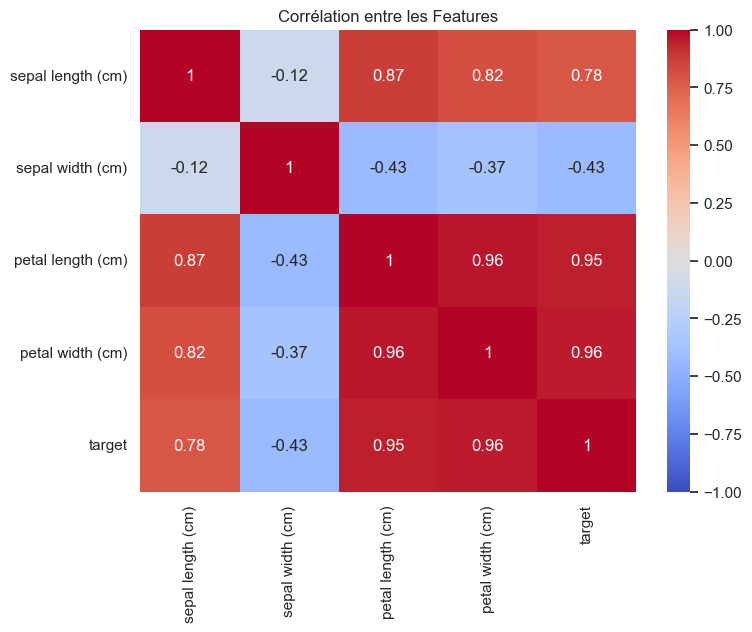

In [5]:
plt.figure(figsize=(8, 6))
# On retire la cible pour la corrélation
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Corrélation entre les Features")
plt.show()